In [1]:
import pandas as pd
import numpy as np
import math
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import time

# 1. Reading Elevation and Moisture File

In [2]:
Mst = pd.read_csv('MoistureFile/MoistureAndElevationUTMTraslated201610.csv')

# 2. Creating the FDS file
## 2.1 Defining the Region Where the Simulation Takes Place

In [3]:
Min_x = 0
Max_x = 1000
Min_y = 0
Max_y = 1000
Mst = Mst[(Mst.x > Min_x-1) & (Mst.x < Max_x) & (Mst.y > Min_y-1) & (Mst.y < Max_y)]


# Defining the Resolution in meters

In [4]:
R = 3
Mst = Mst[(Mst.x%R==0) & (Mst.y%R==0)]

In [5]:
# Minimum and Maximum elevation
Min_z = 100*(math.floor(Mst['Elevation'].min()/100))
Max_z = math.ceil(Mst['Elevation'].max())
print(Min_z, Max_z)

900 1463


## 2.2 Plotting the Real Data

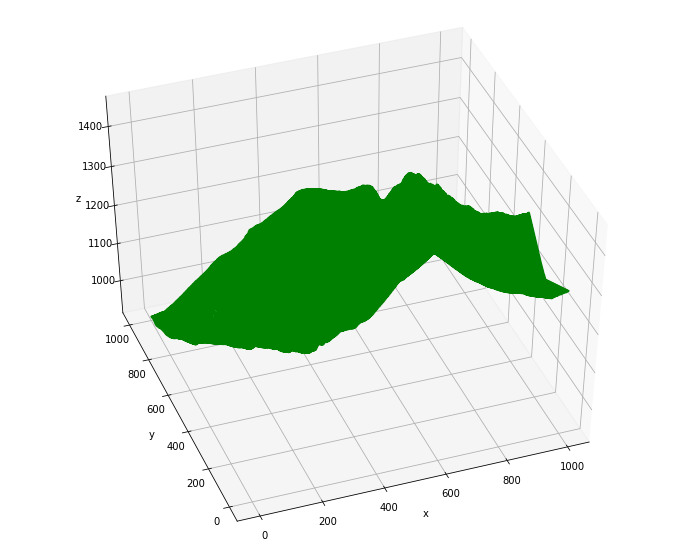

In [6]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot3D(Mst['x'], Mst['y'], Mst['Elevation'], 'green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.view_init(45, 250)
plt.show()

## 2.3 PLotting the Mathematical Domain

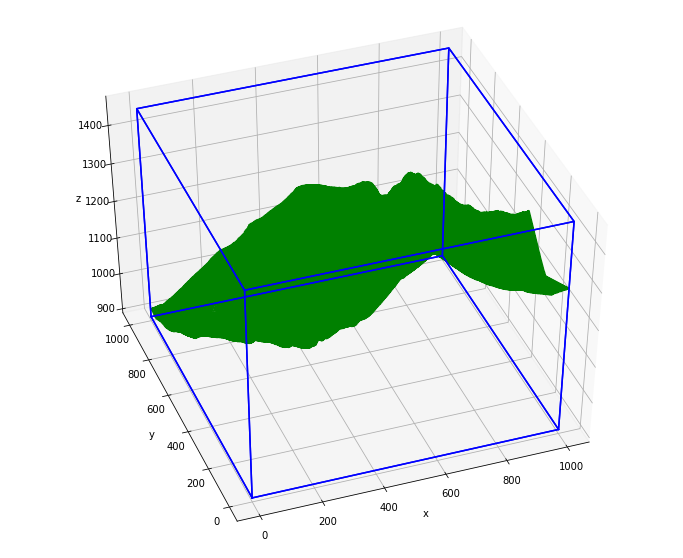

In [7]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.plot3D(Mst['x'], Mst['y'], Mst['Elevation'], 'green')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

# Floor
xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
ycube = [Min_y, Min_y, Max_y, Max_y, Min_y]
zcube = [Min_z, Min_z, Min_z, Min_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# Ceil
xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
ycube = [Min_y, Min_y, Max_y, Max_y, Min_y]
zcube = [Max_z, Max_z, Max_z, Max_z, Max_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# left wall
xcube = [Min_x, Min_x, Min_x, Min_x, Min_x]
ycube = [Min_y, Max_y, Max_y, Min_y, Min_y]
zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# right wall
xcube = [Max_x, Max_x, Max_x, Max_x, Max_x]
ycube = [Min_y, Max_y, Max_y, Min_y, Min_y]
zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# back wall
xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
ycube = [Max_y, Max_y, Max_y, Max_y, Max_y]
zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# front wall
xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
ycube = [Min_x, Min_x, Min_x, Min_x, Min_x]
zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')


ax.view_init(45, 250)
plt.show()

## 2.4 Writing the Input FDS File

In [8]:
# Output File
filename = f'FDSPROG_{R}m.fds'
fds = open(filename, 'w')

### 2.4.1 Defining the Name of the Output Files

In [9]:
fds.write("&HEAD CHID='Chimney_tops_1m', TITLE='Simulation of Chimney Tops fire' /\n\n")

73

### 2.4.2 Defining the Pattern Mesh and Covering the Domain

In [10]:
Nmx = 4     # Number of meshes in x-direction 
Nmy = 4     # Number pf meshes in y-direction
Nmz = 1     # Nmber of Meshes  in z-direction

DX  = (Max_x-Min_x)/Nmx
DY  = (Max_y-Min_y)/Nmy
DZ  = (Max_z-Min_z)/Nmz

In [11]:
Nx = math.ceil(DX/R)     # Number of cells in x-direction first mesh (Resolution)
Ny = math.ceil(DY/R)     # Number of cells in y-direction first mesh (Resolution)
Nz = math.ceil(DZ/R)     # Number of cells in z-direction first mesh (Resolution)

### 2.4.3 Plotting the Submeshes

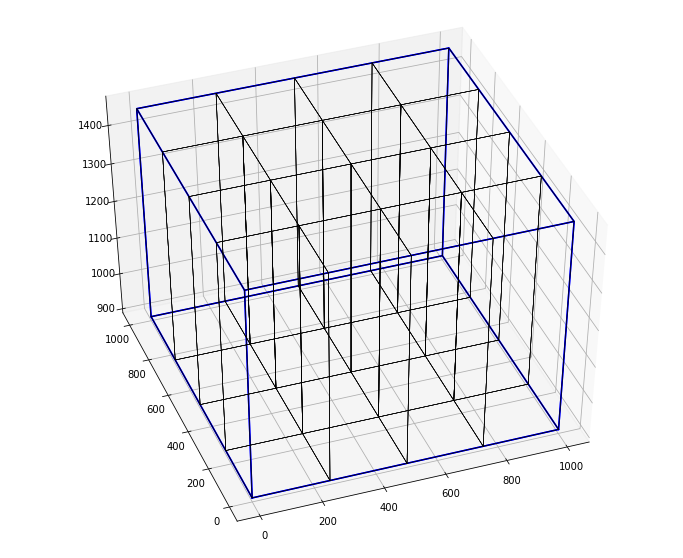

In [12]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# Floor
xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
ycube = [Min_y, Min_y, Max_y, Max_y, Min_y]
zcube = [Min_z, Min_z, Min_z, Min_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# Ceiling
xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
ycube = [Min_y, Min_y, Max_y, Max_y, Min_y]
zcube = [Max_z, Max_z, Max_z, Max_z, Max_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# left wall
xcube = [Min_x, Min_x, Min_x, Min_x, Min_x]
ycube = [Min_y, Max_y, Max_y, Min_y, Min_y]
zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# right wall
xcube = [Max_x, Max_x, Max_x, Max_x, Max_x]
ycube = [Min_y, Max_y, Max_y, Min_y, Min_y]
zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# back wall
xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
ycube = [Max_y, Max_y, Max_y, Max_y, Max_y]
zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')

# front wall
xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
ycube = [Min_x, Min_x, Min_x, Min_x, Min_x]
zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
ax.plot3D(xcube,ycube,zcube,'blue')


#ax.view_init(45, 250)
#plt.show()
Min_x0 = Min_x
Max_x0 = Min_x0 + DX

Min_y0 = Min_y
Max_y0 = Min_y0 + DY

Min_z0 = Min_z
Max_z0 = Min_z0 + DZ


for i in range(Nmx):
    for j in range(Nmy):
        for k in range(Nmz):  
            Min_x = Min_x0 + i*DX
            Max_x = Max_x0 + i*DX
            
            Min_y = Min_y0 + j*DY
            Max_y = Max_y0 + j*DX
            
            Min_z = Min_z0 + k*DZ
            Max_z = Max_z0 + k*DZ
            # Floor
            xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
            ycube = [Min_y, Min_y, Max_y, Max_y, Min_y]
            zcube = [Min_z, Min_z, Min_z, Min_z, Min_z]
            ax.plot3D(xcube,ycube,zcube,'black',linewidth=0.5)

            # Ceil
            xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
            ycube = [Min_y, Min_y, Max_y, Max_y, Min_y]
            zcube = [Max_z, Max_z, Max_z, Max_z, Max_z]
            ax.plot3D(xcube,ycube,zcube,'black',linewidth=0.5)

            # left wall
            xcube = [Min_x, Min_x, Min_x, Min_x, Min_x]
            ycube = [Min_y, Max_y, Max_y, Min_y, Min_y]
            zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
            ax.plot3D(xcube,ycube,zcube,'black',linewidth=0.5)

            # right wall
            xcube = [Max_x, Max_x, Max_x, Max_x, Max_x]
            ycube = [Min_y, Max_y, Max_y, Min_y, Min_y]
            zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
            ax.plot3D(xcube,ycube,zcube,'black',linewidth=0.5)

            # back wall
            xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
            ycube = [Max_y, Max_y, Max_y, Max_y, Max_y]
            zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
            ax.plot3D(xcube,ycube,zcube,'black',linewidth=0.5)

            # front wall
            xcube = [Min_x, Max_x, Max_x, Min_x, Min_x]
            ycube = [Min_y, Min_y, Min_y, Min_y, Min_y]
            zcube = [Min_z, Min_z, Max_z, Max_z, Min_z]
            ax.plot3D(xcube,ycube,zcube,'black',linewidth=0.5)
            ax.view_init(45, 250)
plt.show()  
        


In [13]:
fds.write(f"&MESH IJK={Nx},{Ny},{Nz}, XB={Min_x0},{Min_x0+DX},{Min_y0},{Min_y0+DY},{Min_z0},{Min_z0+DZ}, MULT_ID='mesh' / \n")
fds.write(f"&MULT ID='mesh', DX={DX}, DY={DY}, DZ={DZ}, I_LOWER=0, I_UPPER={Nmx-1}, J_LOWER=0, J_UPPER={Nmy-1}, K_UPPER={Nmz-1} /  \n\n")


106

### 2.4.4 Time Initialization

In [14]:
T_end    = 300.0
DT       = 0.1
NFRAMES  = 1

fds.write("&MISC TMPA=30., TERRAIN_CASE=.TRUE., VERBOSE=.TRUE. / \n\n")

fds.write(f"&TIME T_END = {T_end}, DT={DT} /\n\n")

fds.write(f"&DUMP NFRAMES={NFRAMES}, DT_PART=100., CFL_FILE=.TRUE. /  \n\n")

52

### 2.4.5 Fire Variables Initialization

In [15]:
fds.write("&WIND DIRECTION=135., SPEED=5., SPONGE_CELLS=0, STRATIFICATION=.FALSE. /\n\n")

fds.write("&SURF ID='FIRE', HRRPUA=1500., COLOR='ORANGE', RAMP_Q='fire' /\n")
fds.write("&RAMP ID='fire', T= 0., F=0. /\n")
fds.write("&RAMP ID='fire', T= 1., F=1. /\n")
fds.write("&RAMP ID='fire', T= 30., F=1. /\n")
fds.write("&RAMP ID='fire', T= 31., F=0. /\n\n")

fds.write("&SLCF PBZ=1250., AGL_SLICE=1., QUANTITY='VELOCITY', VECTOR=.TRUE. /\n\n")

fds.write("&VENT MB='XMIN', SURF_ID='OPEN' /  \n")
fds.write("&VENT MB='XMAX', SURF_ID='OPEN' /  \n")
fds.write("&VENT MB='YMIN', SURF_ID='OPEN' /  \n")
fds.write("&VENT MB='YMAX', SURF_ID='OPEN' /  \n")
fds.write("&VENT MB='ZMAX', SURF_ID='OPEN' /  \n\n")
fds.write("&REAC FUEL='CELLULOSE', C=6, H=10, O=5, SOOT_YIELD=0.005 / \n\n")
fds.write("&SPEC ID='WATER VAPOR' / \n\n")

fds.write("&SURF ID                        = 'grass' \n")
fds.write("      MATL_ID(1,1:2)            = 'GENERIC VEGETATION','MOISTURE'\n")
fds.write("      MATL_MASS_FRACTION(1,1:2) = 0.937,0.063\n")
fds.write("      THICKNESS                 = 0.0002\n")
fds.write("      LENGTH                    = 0.21\n")
fds.write("      HEAT_TRANSFER_COEFFICIENT = 30.\n")
fds.write("      GEOMETRY                  = 'CYLINDRICAL' /\n\n")

fds.write("&SURF ID                        = 'needles' \n")
fds.write("      MATL_ID(1,1:2)            = 'GENERIC VEGETATION','MOISTURE'\n")
fds.write("      MATL_MASS_FRACTION(1,1:2) = 0.95,0.05\n")
fds.write("      THICKNESS                 = 0.02\n")
fds.write("      LENGTH                    = 0.21\n")
fds.write("      HEAT_TRANSFER_COEFFICIENT = 30.\n")
fds.write("      GEOMETRY                  = 'CYLINDRICAL' /\n\n")

fds.write("&MATL ID = 'GENERIC VEGETATION' \n")
fds.write("      DENSITY = 500.\n")
fds.write("      CONDUCTIVITY = 0.1\n")
fds.write("      SPECIFIC_HEAT= 1.5\n")
fds.write("      REFERENCE_TEMPERATURE = 200\n")
fds.write("      PYROLYSIS_RANGE = 30.\n")
fds.write("      NU_MATL = 0.2\n")
fds.write("      NU_SPEC = 0.8 \n")
fds.write("      SPEC_ID = 'CELLULOSE'\n")
fds.write("      HEAT_OF_COMBUSTION = 15600.\n")
fds.write("      HEAT_OF_REACTION = 418.\n")
fds.write("      MATL_ID  = 'CHAR' /\n\n")

fds.write("&MATL ID = 'MOISTURE' \n")
fds.write("      DENSITY = 1000.\n")
fds.write("      CONDUCTIVITY = 0.1\n")
fds.write("      SPECIFIC_HEAT= 4.184\n")
fds.write("      REFERENCE_TEMPERATURE = 100.\n")
fds.write("      PYROLYSIS_RANGE = 10.\n")
fds.write("      NU_SPEC = 1.0 \n")
fds.write("      SPEC_ID = 'WATER VAPOR'\n")
fds.write("      HEAT_OF_REACTION = 2500./\n\n")

fds.write("&MATL ID = 'CHAR'\n")
fds.write("      DENSITY  = 100.\n")
fds.write("      CONDUCTIVITY = 0.1 \n")
fds.write("      SPECIFIC_HEAT = 1.0 / \n\n")

fds.write("&MATL ID='DIRT'\n")
fds.write("      CONDUCTIVITY = 0.25\n")
fds.write("      SPECIFIC_HEAT = 2.\n")
fds.write("     DENSITY = 1300. /\n\n")

fds.write("&PART ID='foliage', DRAG_COEFFICIENT=1.0, SURF_ID='needles', SAMPLING_FACTOR=5,\n")
fds.write("      QUANTITIES='PARTICLE TEMPERATURE','PARTICLE MASS','PARTICLE DIAMETER', STATIC=.TRUE., COLOR='GREEN' / \n\n")

fds.write("&PART ID='grass', DRAG_COEFFICIENT=1.0, SURF_ID='grass', SAMPLING_FACTOR=958,\n")
fds.write("      QUANTITIES='PARTICLE TEMPERATURE','PARTICLE MASS','PARTICLE DIAMETER', STATIC=.TRUE., COLOR='BROWN' /\n\n")

fds.write("&SURF ID = 'surf1', RGB = 122,117,48, MATL_ID='DIRT', THICKNESS=0.2, PART_ID='grass', PARTICLE_SURFACE_DENSITY=1.0 / \n")
fds.write("&SURF ID = 'surf2', RGB = 0,100,0, MATL_ID='DIRT', THICKNESS=0.2 / \n\n")



69

### 2.4.6 Location of the Fire

In [16]:
rows = Mst.shape[0]
# Position of the ignition point
Location = [499,499]
# Locating that position in the Moisture File
Indice = Mst[(Mst['x'] < Location[0]+5) & (Mst['x'] > Location[0]-4) & (Mst['y'] < Location[1]+4) & (Mst['y'] > Location[1]-2)].index
Indice2 = [i for i in Mst.index if i not in Indice.values]

## 2.4.7 Obstruction 

In [17]:
# Writing the location of the fire
for ind in Indice.values:
    fds.write(f"&OBST XB={Mst['x'][ind]},{Mst['x'][ind]+R},{Mst['y'][ind]},{Mst['y'][ind]+R},{Min_z0},{Mst['Elevation'][ind]} SURF_IDS='FIRE','surf1' /\n")

# Writing the obstacles  [x for x in xrange(100) if x != 50]

for i in Indice2: 
    fds.write(f"&OBST XB={Mst['x'][i]},{Mst['x'][i]+R},{Mst['y'][i]},{Mst['y'][i]+R},{Min_z0},{Mst['Elevation'][i]} SURF_ID='surf1'/\n")
    
fds.write("\n&TAIL /")


8

In [18]:
fds.close()

In [ ]:
Nx*Ny*Nz*32